# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [44]:
# Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols #Summary statistics

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
data = pd.read_csv('C:/Users/leandro/desktop/ironhack/module-2/Pivot-Table-Correlation/data/employee.csv')


In [5]:
data.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [12]:
# Method 1
# your code here
data.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [13]:
# Method 2
# your code here
data.groupby(['Department'])['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [15]:
# your code here
data.pivot_table(index=["Department"],columns= ['Title'], values=["Salary"], aggfunc=np.mean)

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [19]:
# your code here
data.pivot_table(index=["Title"],values=["Salary",'Years'])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [21]:
# your code here
data.pivot_table(index=['Department'],columns= ['Title'], values=["Salary"],aggfunc=np.mean)

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [38]:
# your code here
data.pivot_table(index=['Department'],columns= ['Title'], values=["Salary"],aggfunc=['mean','min','max','std'], fill_value =0)

mean                      min                      max          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR             70    32.5         0     70      30         0     70      35   
IT             70    32.5        60     70      30        60     70      35   
Sales           0     0.0        55      0       0        55      0       0   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR                 0  3.535534         0  
IT                60  3.535534         0  
Sales             55  0.000000         0

In [33]:
"""
your commments here
"""

'\nyour commments here\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [35]:
# your code here
data.pivot_table(index=['Department'], values=["Salary"],aggfunc=np.sum)

,Salary
Department,
HR,135
IT,195
Sales,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [39]:
# your code here
data.pivot_table(index=['Department'], columns=["Title"],values = ['Years'], aggfunc={'Salary':np.mean})

C:\Users\leandro\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


KeyError: 'Salary'

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [45]:
# your code here
fitbit = pd.read_csv('C:/Users/leandro/desktop/ironhack/module-2/Pivot-Table-Correlation/data/fitbit.csv')
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,8/5/2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,9/5/2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10/5/2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


In [54]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [42]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [43]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [46]:
# your code here
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = pd.DataFrame(data= fitbit, columns=['Minutes Very Active'])
Y = pd.DataFrame(data= fitbit, columns=['Steps'])
model = lm.fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Minutes Very Active ~Steps",data=data).fit()
print(model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [52]:
import matplotlib.pyplot as plt;

Text(0, 0.5, 'Steps')

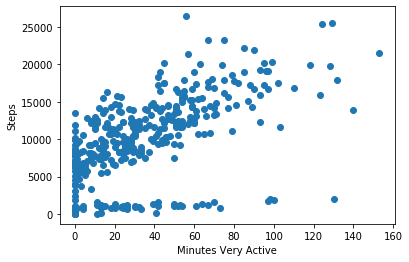

In [55]:
"""
plt.scatter(#, #)
plt.title(#)
plt.xlabel(#)
plt.ylabel(#)
plt.show()
"""
x = fitbit['Minutes Very Active']
y = fitbit['Steps']
fig, ax = plt.subplots(1,1)
plt.scatter(x,y)
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""

In [112]:
fitbit['Minutes_Sedentary']=fitbit['Minutes Sedentary']

In [116]:
fitbit['Minutes_Sedentary']

0        1.355
1      611.000
2      602.000
3      749.000
4      876.000
        ...   
362    599.000
363    684.000
364    701.000
365    575.000
366    564.000
Name: Minutes_Sedentary, Length: 367, dtype: float64

In [117]:
# your code here
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = pd.DataFrame(data= fitbit, columns=['Minutes_Sedentary'])
Y = pd.DataFrame(data= fitbit, columns=['Steps'])
model = lm.fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables

In [118]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Minutes_Sedentary ~Steps',data=data).fit()
print(model.summary())

PatsyError: Error evaluating factor: NameError: name 'Minutes_Sedentary' is not defined
    Minutes_Sedentary ~Steps
    ^^^^^^^^^^^^^^^^^

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0, 0.5, 'Steps')

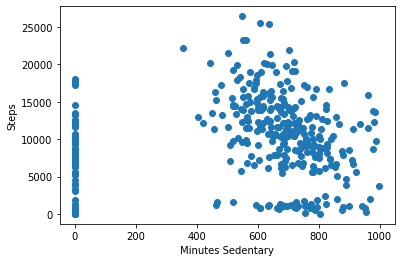

In [119]:
x = fitbit['Minutes Sedentary']
y = fitbit['Steps']
fig, ax = plt.subplots(1,1)
plt.scatter(x,y)
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [79]:
# your code here
lm = linear_model.LinearRegression()
X = pd.DataFrame(data= fitbit, columns=['MinutesOfSleep'])
Y = pd.DataFrame(data= fitbit, columns=['Steps'])
model = lm.fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
model = ols("MinutesOfSleep~Steps",data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         MinutesOfSleep   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.372
Date:                Fri, 21 Feb 2020   Prob (F-statistic):             0.0120
Time:                        08:46:30   Log-Likelihood:                -2367.4
No. Observations:                 367   AIC:                             4739.
Df Residuals:                     365   BIC:                             4747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    253.8086     16.594     15.295      0.0

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0, 0.5, 'Steps')

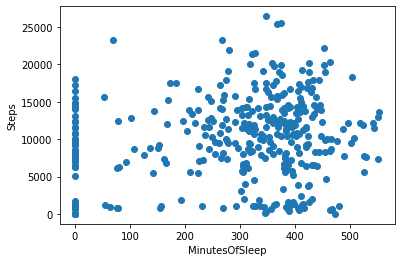

In [78]:
# your code here
x = fitbit['MinutesOfSleep']
y = fitbit['Steps']
fig, ax = plt.subplots(1,1)
plt.scatter(x,y)
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [81]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [86]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')

In [96]:
# your code here
cor_fit=fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
cor_fit.head(2)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454


In [108]:
corrMatrix=cor_fit.corr()
corrMatrix

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

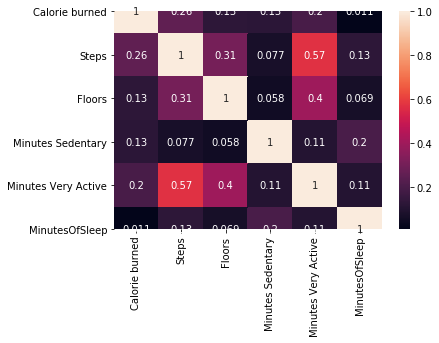

In [104]:
import seaborn as sn
sn.heatmap(corrMatrix, annot=True)

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [65]:
# your code here
data_t = pd.read_csv('C:/Users/leandro/desktop/ironhack/module-2/Pivot-Table-Correlation/data/Time_Grades.csv')
data_time=pd.DataFrame(data_t)
data_time.head(2)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7


#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013C68C57D48>,
      dtype=object)

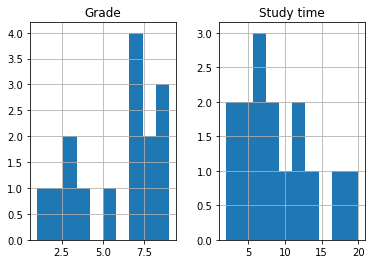

In [64]:
# your code here
data_time.hist()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [71]:
# your code here
from scipy.stats import pearsonr
corr=pearsonr(data_time['Study time'],data_time['Grade'])
corr

(0.7980456073578857, 0.0003627635256342742)

In [72]:
from scipy.stats import spearmanr
corr1=spearmanr(data_time['Study time'],data_time['Grade'])
corr1

SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

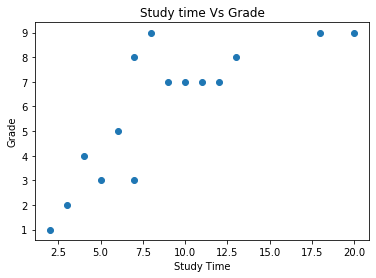

In [77]:
# your code here
import matplotlib.pyplot as plot
import numpy as np
plt.scatter(data_time['Study time'],data_time['Grade'])
plot.title('Study time Vs Grade')
plot.xlabel('Study Time')
plot.ylabel('Grade')   
plot.show()

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""